<a href="https://colab.research.google.com/github/Kang-Inprogress/-ML/blob/tf_practice/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TPU 사용: https://wikidocs.net/119990

In [ ]:
!pip show tensorflow

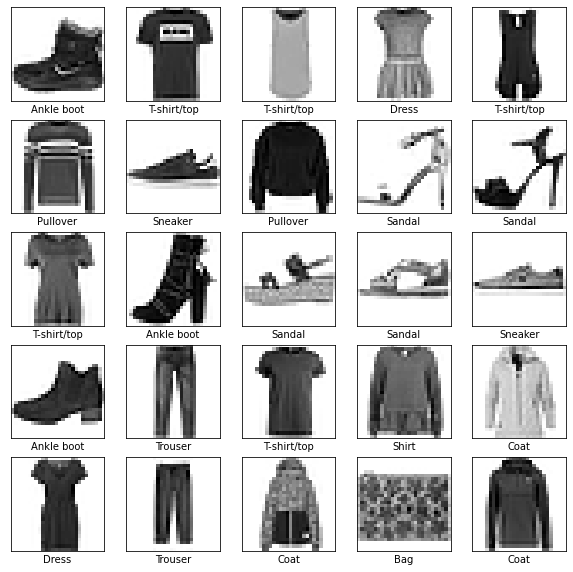

In [17]:
!pip install -q tensorflow-gpu==2.7.0-rc1
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images/255.0
test_images = test_images/255.0

# label
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [3]:
# 층 쌓기
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [4]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
# 모델 학습
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5010 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3748 - accuracy: 0.8664
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3364 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3107 - accuracy: 0.8867
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2930 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2778 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2659 - accuracy: 0.9020
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2559 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2438 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.236

In [6]:
# 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3374 - accuracy: 0.8874 - 859ms/epoch - 3ms/step

Test accuracy: 0.8873999714851379


In [8]:
probability_model = tf.keras.Sequential([model, 
                                        tf.keras.layers.Softmax()])

# 예측!                                         
predictions = probability_model.predict(test_images)
# 같은 결과가 나온다
print(np.argmax(predictions[0]))
print(test_labels[0])

9
9


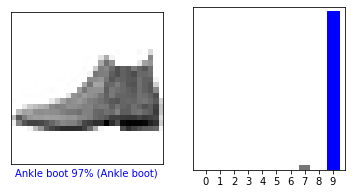

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()
  

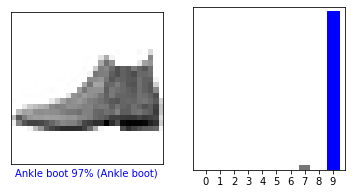

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

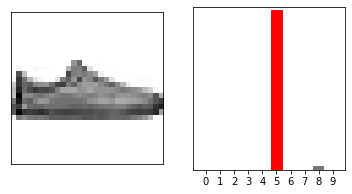

In [15]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

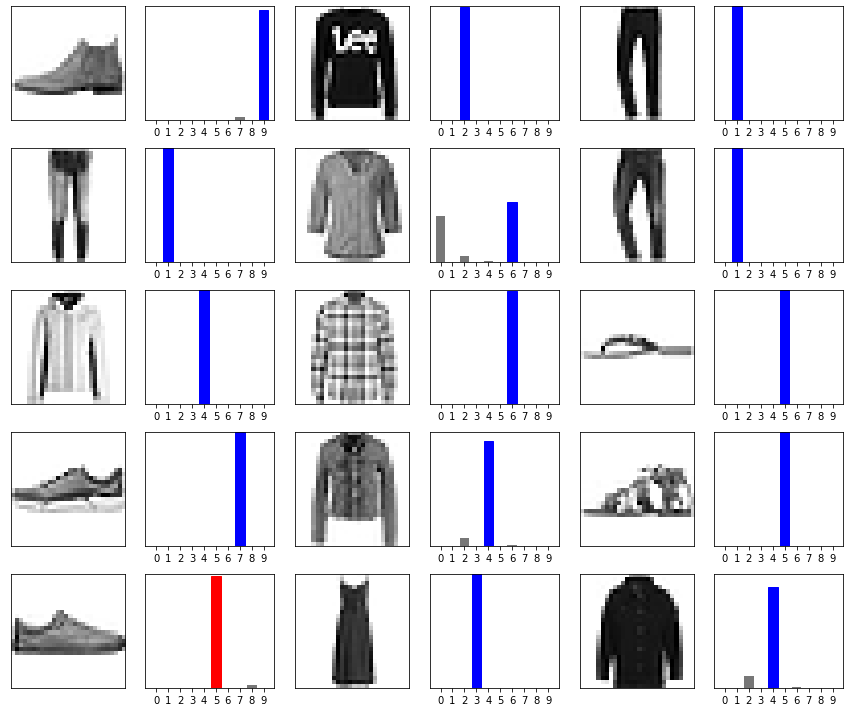

In [16]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()